<a href="https://colab.research.google.com/github/chrisalpuerto/Bball-shot-Detection/blob/main/HoopDetectionYOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoop Detection Using YOLOv8
In this session I will be creating a player detection model using YOLOv8



In [4]:
!pip install ultralytics roboflow kaggle

In [5]:
from ultralytics import YOLO
from roboflow import Roboflow
rf = Roboflow(api_key="kSbyldBcppeFTfZOiAQr")
project = rf.workspace("train-apozl").project("basketball-hoop-detection-bcxld-yphlb")
version = project.version(1)
dataset = version.download("yolov11")

model = YOLO('yolo11n.pt')

loading Roboflow workspace...
loading Roboflow project...


100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


In [6]:
print(dataset.location)
!ls /content/Basketball-Hoop-Detection--1/
base_path = '/content/Basketball-Hoop-Detection--1/'

/content/Basketball-Hoop-Detection--1
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
import os, shutil
from sklearn.model_selection import train_test_split

# create paths
base_path = '/content/Basketball-Hoop-Detection--1/'
train_images = os.path.join(base_path, "train", "images")
train_labels = os.path.join(base_path, "train", "labels")
val_images = os.path.join(base_path, "valid", "images")

# get all images files
images = os.listdir(train_images)
train_files, val_files = train_test_split(images, test_size=0.2, random_state=42)

# Create new valid folders
os.makedirs(os.path.join(base_path, "valid", "images"), exist_ok=True) # image directory
os.makedirs(os.path.join(base_path, "valid", "labels"), exist_ok=True) # label directory

for file in val_files:
    shutil.move(os.path.join(train_images, file), os.path.join(base_path, "valid", "images", file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    shutil.move(os.path.join(train_labels, label_file), os.path.join(base_path, "valid", "labels", label_file))

Double checking length and the file type of dataset. Here we can see we are working with about 2023 images and all of them are jpg files

In [8]:
# checking length of dataset, as well as names of first n images

print(len(images))
res = 0
n = len(images)
for i in range(n):
  if (images[i])[-4:] == '.jpg':
    res += 1
if n == len(images):
  print(f"Amount of .jpg files in the dataset: {res}")
else:
  print(f"Amount of .jpg files with the first {n} images is {res}")


2023
Amount of .jpg files in the dataset: 2023


In [9]:
!ls /content/Basketball-Hoop-Detection--1/

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


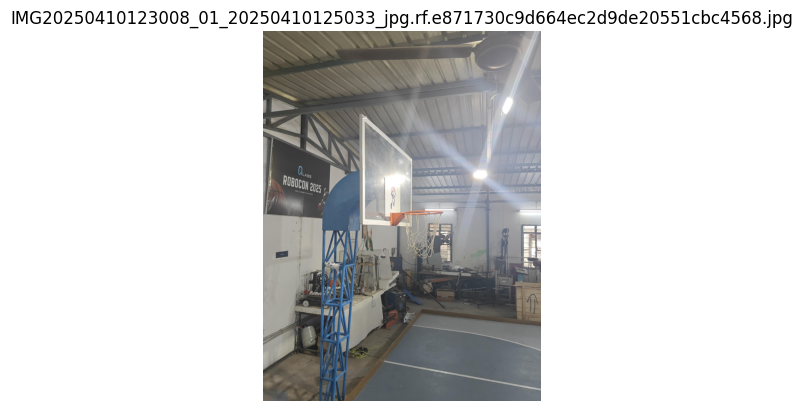

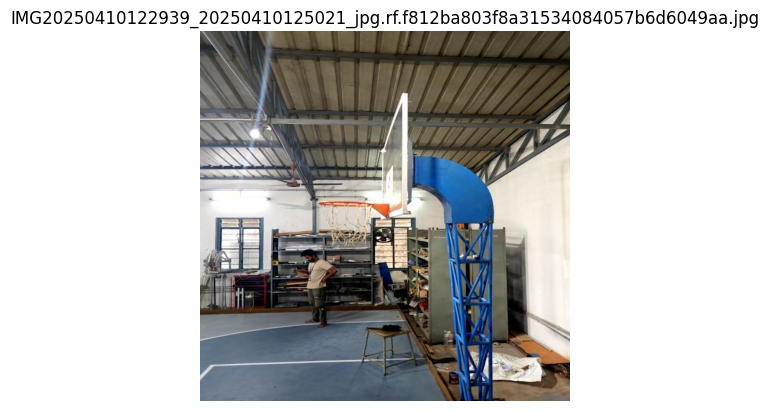

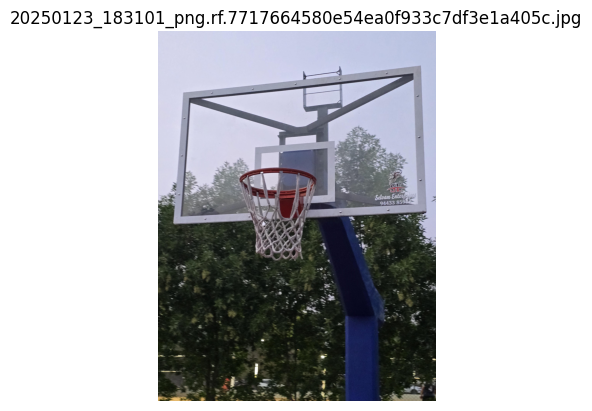

In [10]:
import matplotlib.pyplot as plt
import cv2
# train_images is image folder file path
image_file_test = os.listdir(train_images)

# check to see images in the middle of dataset

n = len(image_file_test) // 2


for i in range(n, n+3):
  img_path = os.path.join(train_images, image_file_test[i])
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(image_file_test[i])
  plt.axis('off')
  plt.show()

In [11]:
model = YOLO("yolo11n.pt")
model.train(data="/content/Basketball-Hoop-Detection--1/data.yaml", epochs=110)

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Basketball-Hoop-Detection--1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=110, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    431062  ultralytics.nn.modules.head.Detect           [2, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1703.2±691.1 MB/s, size: 203.6 KB)


train: Scanning /content/Basketball-Hoop-Detection--1/train/labels... 1618 images, 195 backgrounds, 0 corrupt: 100%|██████████| 1618/1618 [00:00<00:00, 2410.35it/s]

train: New cache created: /content/Basketball-Hoop-Detection--1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 1428. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1140.8±1398.6 MB/s, size: 495.9 KB)


val: Scanning /content/Basketball-Hoop-Detection--1/valid/labels... 680 images, 57 backgrounds, 0 corrupt: 100%|██████████| 680/680 [00:00<00:00, 990.32it/s] 


val: New cache created: /content/Basketball-Hoop-Detection--1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 110 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/110       2.3G      1.195      2.424       1.16          4        640: 100%|██████████| 102/102 [00:55<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:29<00:00,  1.34s/it]

                   all        680        632      0.993      0.378       0.47      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/110       2.7G      1.105      1.406      1.123          1        640: 100%|██████████| 102/102 [00:45<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]


                   all        680        632      0.968      0.439      0.468      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/110      2.71G      1.086      1.081      1.126          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.14s/it]


                   all        680        632      0.966      0.453      0.478      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/110      2.72G      1.041     0.8587      1.101          4        640: 100%|██████████| 102/102 [00:43<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]


                   all        680        632      0.986       0.46      0.484       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/110      2.74G       1.05     0.7715      1.108          5        640: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.983      0.476      0.491      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/110      2.75G      1.006     0.6906      1.087          4        640: 100%|██████████| 102/102 [00:41<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.966      0.459      0.478      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/110      2.78G      1.015     0.6713      1.097          3        640: 100%|██████████| 102/102 [00:40<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.993      0.466       0.49       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/110      2.78G     0.9905     0.6572      1.099          3        640: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]


                   all        680        632      0.989      0.477      0.515      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/110       2.8G     0.9801     0.6397      1.074          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.986      0.482      0.493       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/110      2.81G     0.9854     0.6227      1.086          1        640: 100%|██████████| 102/102 [00:45<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.14s/it]

                   all        680        632      0.992      0.476      0.491      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/110      2.83G     0.9528     0.6061       1.07          2        640: 100%|██████████| 102/102 [00:45<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632       0.48      0.447      0.475      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/110      2.84G     0.9494     0.5854      1.064          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.491       0.48      0.492      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/110      2.86G     0.9283     0.5776      1.064          3        640: 100%|██████████| 102/102 [00:43<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.22s/it]

                   all        680        632      0.984      0.484      0.492      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/110      2.87G     0.9457     0.5741       1.06          5        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.992       0.48      0.494      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/110      2.89G     0.9152     0.5487      1.054          3        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.476      0.454      0.482      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/110       2.9G     0.9036      0.545      1.047          2        640: 100%|██████████| 102/102 [00:42<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.11s/it]

                   all        680        632      0.488      0.481      0.491      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/110      2.92G     0.9124     0.5417      1.047          2        640: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.491      0.479      0.491      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/110      2.93G     0.9104     0.5329       1.05          4        640: 100%|██████████| 102/102 [00:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.488      0.482      0.492      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/110      2.95G     0.8997     0.5231      1.038          4        640: 100%|██████████| 102/102 [00:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.492      0.468      0.493      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/110      2.96G     0.8859     0.5098      1.044          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.482      0.486      0.491      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/110      2.98G     0.8816     0.5178      1.035          3        640: 100%|██████████| 102/102 [00:42<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.485      0.482      0.496      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/110      2.99G     0.8787     0.5052      1.029          5        640: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.489      0.477      0.493      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/110      3.01G     0.8972     0.5145      1.044          6        640: 100%|██████████| 102/102 [00:45<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.485      0.488      0.492      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/110      3.02G     0.8826     0.5048      1.036          2        640: 100%|██████████| 102/102 [00:41<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        632      0.495      0.471       0.49      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/110      3.04G     0.8758     0.5004      1.038          1        640: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.488      0.484      0.495      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/110      3.05G      0.879     0.5031       1.03          3        640: 100%|██████████| 102/102 [00:43<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.491       0.48      0.493      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/110      3.07G     0.8586     0.4835      1.031          1        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.25s/it]

                   all        680        632       0.49      0.482      0.494      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/110      3.08G     0.8528      0.487       1.03          4        640: 100%|██████████| 102/102 [00:46<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.479      0.488      0.493      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/110       3.1G     0.8539     0.4718       1.02          4        640: 100%|██████████| 102/102 [00:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        632      0.487      0.482      0.495      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/110      3.11G     0.8643     0.4837      1.033          3        640: 100%|██████████| 102/102 [00:46<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.985      0.488      0.494      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/110      3.13G     0.8391     0.4691       1.01          6        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.23s/it]

                   all        680        632      0.487      0.488      0.492      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/110      3.14G     0.8527     0.4756      1.026          3        640: 100%|██████████| 102/102 [00:46<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.485      0.484      0.494      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/110      3.16G     0.8448     0.4596      1.021          5        640: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.489      0.484      0.495      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/110      3.17G      0.838     0.4609      1.023          3        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.494      0.483      0.495      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/110      3.19G     0.8143     0.4578      1.005          3        640: 100%|██████████| 102/102 [00:45<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.489      0.476      0.494      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/110       3.2G     0.8401     0.4671      1.012          6        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.493      0.482      0.494      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/110      3.22G     0.8082     0.4464      1.002          4        640: 100%|██████████| 102/102 [00:45<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.489      0.484      0.493      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/110      3.22G     0.8208     0.4437      1.003          4        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.488      0.486      0.493      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/110      3.25G     0.8193     0.4494      1.009          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.493      0.478      0.493      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/110      3.25G     0.8049     0.4405      1.004          4        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.10s/it]

                   all        680        632      0.487      0.489      0.494      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/110      3.28G     0.7912     0.4365     0.9936          3        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]


                   all        680        632      0.487      0.486      0.494      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/110      3.29G     0.8112     0.4452      1.001          4        640: 100%|██████████| 102/102 [00:45<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        632       0.99      0.486      0.494      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/110      3.31G     0.7999     0.4365     0.9996          4        640: 100%|██████████| 102/102 [00:45<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]


                   all        680        632      0.486      0.489      0.496      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/110      3.31G     0.8116     0.4399      1.008          3        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        632      0.487      0.485      0.494      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/110      3.34G     0.8058     0.4279     0.9973          4        640: 100%|██████████| 102/102 [00:45<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.11s/it]

                   all        680        632      0.493      0.479      0.495      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/110      3.34G     0.8012     0.4452      0.988          0        640: 100%|██████████| 102/102 [00:46<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.491      0.486      0.495      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/110      3.37G     0.8247     0.4522      1.017          4        640: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.11s/it]

                   all        680        632      0.487      0.485      0.492      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/110      3.37G     0.7905     0.4383     0.9965          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.494      0.483      0.495       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/110       3.4G     0.8121     0.4341          1          4        640: 100%|██████████| 102/102 [00:45<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.487      0.489      0.496      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/110       3.4G     0.7939     0.4249     0.9961          5        640: 100%|██████████| 102/102 [00:45<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.489      0.487      0.494      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/110      3.43G     0.8003     0.4402      1.005          1        640: 100%|██████████| 102/102 [00:45<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.495      0.484      0.493      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/110      3.43G     0.8047      0.425          1          2        640: 100%|██████████| 102/102 [00:42<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.20s/it]

                   all        680        632      0.989       0.49      0.494      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/110      3.46G     0.7845     0.4208      0.991          2        640: 100%|██████████| 102/102 [00:45<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.488      0.487      0.494      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/110      3.46G      0.777     0.4212     0.9883          3        640: 100%|██████████| 102/102 [00:45<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]


                   all        680        632      0.491      0.485      0.494      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/110      3.48G     0.7812     0.4239     0.9931          2        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]


                   all        680        632      0.497      0.469      0.494      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/110      3.49G     0.7812     0.4165     0.9976          2        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.491      0.484      0.495      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/110      3.51G     0.7784     0.4075     0.9911          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.487      0.488      0.494      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/110      3.52G     0.7766     0.4073     0.9913          3        640: 100%|██████████| 102/102 [00:46<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.488      0.485      0.494      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/110      3.54G     0.7711     0.4095     0.9798          4        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.488      0.487      0.495      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/110      3.55G      0.785     0.4007     0.9957          4        640: 100%|██████████| 102/102 [00:44<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632       0.49      0.487      0.493      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/110      3.57G     0.7652     0.4059      0.991          4        640: 100%|██████████| 102/102 [00:46<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.494      0.486      0.496      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/110      3.58G     0.7927      0.416     0.9977          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.493      0.487      0.496      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/110       3.6G     0.7685     0.4066     0.9887          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632       0.49      0.485      0.496      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/110      3.61G     0.7565     0.3994     0.9757          1        640: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.12s/it]

                   all        680        632      0.489       0.49      0.496      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/110      3.63G     0.7528     0.3955     0.9781          2        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.489      0.485      0.495      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/110      3.64G      0.739     0.3923     0.9708          1        640: 100%|██████████| 102/102 [00:46<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.488      0.486      0.495      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/110      3.66G     0.7598     0.3999     0.9788          7        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.489      0.489      0.495      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/110      3.67G     0.7479     0.3895     0.9749          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.488       0.49      0.494      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/110      3.69G     0.7463      0.389     0.9764          3        640: 100%|██████████| 102/102 [00:46<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        632       0.49      0.489      0.495      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/110       3.7G     0.7556     0.4052     0.9809          3        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.489      0.491      0.494      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/110      3.72G     0.7405     0.3868     0.9764          4        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]


                   all        680        632      0.994      0.488      0.496      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/110      3.73G     0.7424     0.3809     0.9729          6        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.11s/it]

                   all        680        632      0.496      0.486      0.495      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/110      3.75G      0.738     0.3852     0.9764          3        640: 100%|██████████| 102/102 [00:48<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.13s/it]

                   all        680        632      0.487      0.489      0.496      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/110      3.76G     0.7499     0.3876     0.9734          2        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632       0.49      0.487      0.496      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/110      3.78G     0.7403     0.3772     0.9796          1        640: 100%|██████████| 102/102 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.487      0.489      0.495      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/110      3.79G     0.7333     0.3783     0.9716          4        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]

                   all        680        632      0.495      0.482      0.496      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/110      3.81G     0.7461     0.3889     0.9817          5        640: 100%|██████████| 102/102 [00:47<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.495      0.482      0.495      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/110      3.82G     0.7426     0.3823     0.9755          3        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.494      0.482      0.496      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/110      3.84G     0.7441     0.3839     0.9838          4        640: 100%|██████████| 102/102 [00:49<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632       0.49      0.488      0.496        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/110      3.85G      0.732     0.3795     0.9769          3        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.15s/it]


                   all        680        632      0.497      0.481      0.497      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/110      3.87G     0.7197     0.3761     0.9635          6        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.494       0.48      0.497      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/110      3.88G      0.721     0.3735     0.9711          2        640: 100%|██████████| 102/102 [00:45<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.22s/it]

                   all        680        632      0.487      0.489      0.496      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/110       3.9G     0.7333     0.3775      0.976          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        632      0.487      0.489      0.496      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/110      3.91G     0.7161     0.3673      0.966          3        640: 100%|██████████| 102/102 [00:47<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.493      0.482      0.496      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/110      3.93G     0.7107      0.358     0.9661          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        632      0.493      0.485      0.496      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/110      3.94G     0.7248     0.3701     0.9719          4        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.495      0.483      0.494      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/110      3.96G     0.7019     0.3542     0.9581          7        640: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.489      0.489      0.494      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/110      3.96G     0.7087     0.3675     0.9564          4        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        632      0.493      0.482      0.495      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/110      3.99G     0.7124     0.3537     0.9578          3        640: 100%|██████████| 102/102 [00:49<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.493       0.48      0.495      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/110      3.99G     0.7131     0.3592     0.9659          3        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.18s/it]

                   all        680        632      0.486       0.49      0.496      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/110      4.02G     0.7063     0.3587     0.9554          2        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]


                   all        680        632      0.487       0.49      0.496      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/110      4.02G     0.7179     0.3596     0.9707          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.23s/it]

                   all        680        632       0.49       0.49      0.497      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/110      4.05G     0.7217       0.36     0.9746          4        640: 100%|██████████| 102/102 [00:49<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.23s/it]

                   all        680        632       0.49      0.486      0.495      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/110      4.05G      0.694      0.356     0.9673          1        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.24s/it]

                   all        680        632      0.486      0.489      0.496      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/110      4.08G     0.6847     0.3442     0.9489          5        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.17s/it]

                   all        680        632      0.489      0.487      0.496      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/110      4.08G     0.7051     0.3553     0.9599          4        640: 100%|██████████| 102/102 [00:49<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632       0.49      0.484      0.495      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/110      4.11G     0.7055     0.3555     0.9776          4        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632       0.49      0.486      0.494      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/110      4.11G     0.6952     0.3566     0.9596          5        640: 100%|██████████| 102/102 [00:49<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.492      0.482      0.496      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/110      4.13G     0.6972      0.348      0.958          3        640: 100%|██████████| 102/102 [00:48<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.489      0.486      0.494      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/110      4.14G     0.6955      0.346      0.966          4        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.492      0.486      0.496      0.406


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/110      4.16G     0.6582     0.3095     0.9298          2        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.488       0.49      0.496      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/110      4.17G     0.6557     0.3064     0.9263          1        640: 100%|██████████| 102/102 [00:47<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.487      0.486      0.495      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/110       4.2G      0.645     0.2978     0.9234          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.18s/it]

                   all        680        632      0.487      0.486      0.495      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/110       4.2G     0.6564     0.3003     0.9288          1        640: 100%|██████████| 102/102 [00:49<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.16s/it]

                   all        680        632      0.488      0.486      0.495      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/110      4.22G     0.6422     0.2984     0.9263          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.19s/it]

                   all        680        632      0.493      0.481      0.495      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/110      4.23G     0.6382     0.2958     0.9274          2        640: 100%|██████████| 102/102 [00:48<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.21s/it]

                   all        680        632      0.492      0.482      0.495      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/110      4.25G     0.6305     0.2924     0.9225          1        640: 100%|██████████| 102/102 [00:47<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.24s/it]

                   all        680        632      0.493      0.482      0.495      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/110      4.26G     0.6409     0.2915     0.9228          2        640: 100%|██████████| 102/102 [00:45<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:25<00:00,  1.14s/it]

                   all        680        632      0.493      0.481      0.495      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/110      4.28G     0.6446     0.2917       0.93          2        640: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:27<00:00,  1.23s/it]

                   all        680        632      0.494      0.481      0.495      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/110      4.29G     0.6317     0.2883     0.9216          2        640: 100%|██████████| 102/102 [00:46<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:24<00:00,  1.14s/it]

                   all        680        632      0.493       0.48      0.495      0.412



110 epochs completed in 2.219 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:26<00:00,  1.22s/it]


                   all        680        632      0.492      0.482      0.495      0.414
      Basket Ball Hoop        623        628      0.984      0.963       0.99      0.827
        Basketballhoop          4          4          0          0          0          0
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c95162d1650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [12]:
!ls runs/detect/train/weights

best.pt  last.pt


In [14]:
from google.colab import drive
import shutil
drive.mount('/content/drive')

shutil.copy("/content/runs/detect/train/weights/best.pt","/content/drive/MyDrive/hoop_model_2_YOLO11.pt")

Mounted at /content/drive


'/content/drive/MyDrive/hoop_model_2_YOLO11.pt'

In [15]:
!ls test_images1

ls: cannot access 'test_images1': No such file or directory



image 1/1 /content/test_images1/bball4.jpg: 640x640 (no detections), 9.9ms
Speed: 3.5ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Number of hoops in image bball4.jpg is 0


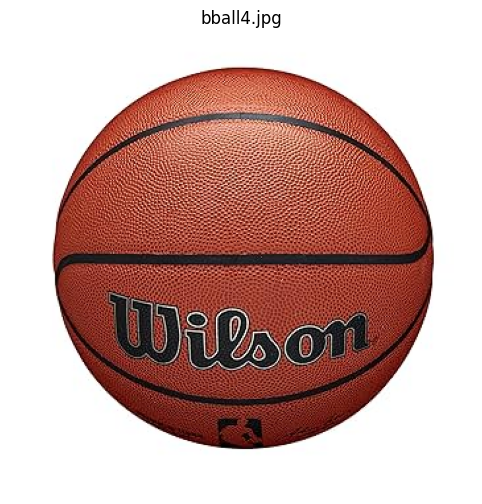


image 1/1 /content/test_images1/bball2.jpg: 640x480 1 Basket Ball Hoop, 61.5ms
Speed: 4.2ms preprocess, 61.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Number of hoops in image bball2.jpg is 1


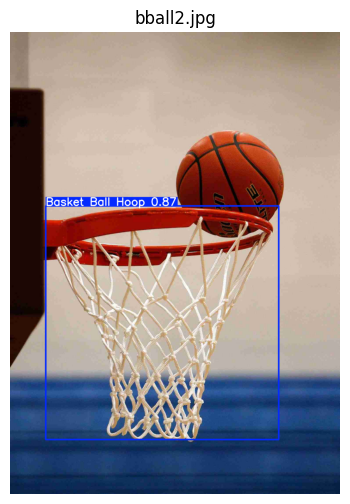


image 1/1 /content/test_images1/bball3.jpg: 448x640 (no detections), 50.4ms
Speed: 4.1ms preprocess, 50.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Number of hoops in image bball3.jpg is 0


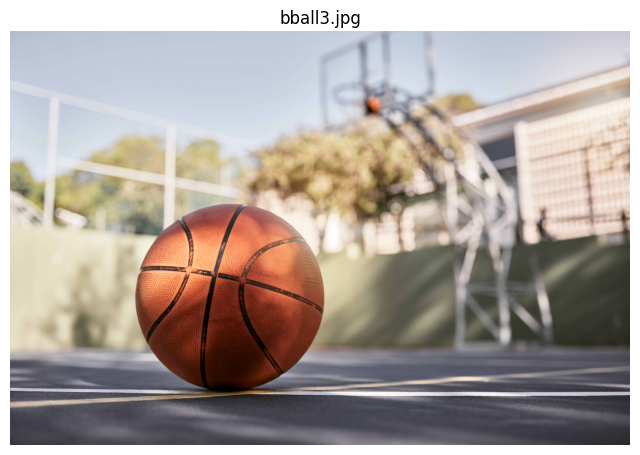


image 1/1 /content/test_images1/random3.jpg: 448x640 (no detections), 42.3ms
Speed: 4.2ms preprocess, 42.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Number of hoops in image random3.jpg is 0


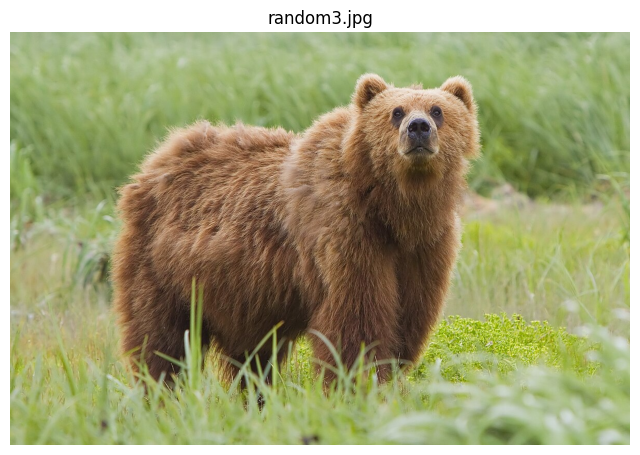


image 1/1 /content/test_images1/Random1.jpg: 384x640 (no detections), 179.5ms
Speed: 2.4ms preprocess, 179.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Number of hoops in image Random1.jpg is 0


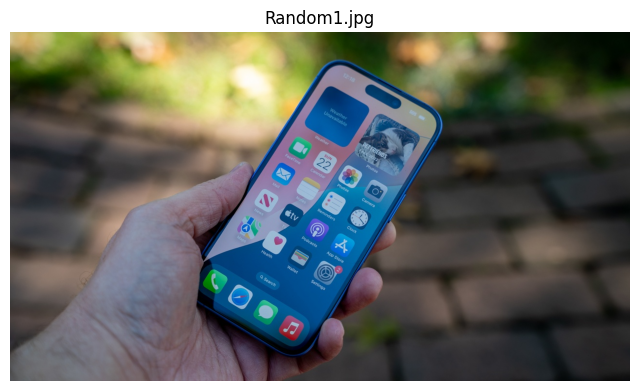


image 1/1 /content/test_images1/Bball1.jpg: 640x416 (no detections), 118.9ms
Speed: 8.2ms preprocess, 118.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 416)
Number of hoops in image Bball1.jpg is 0


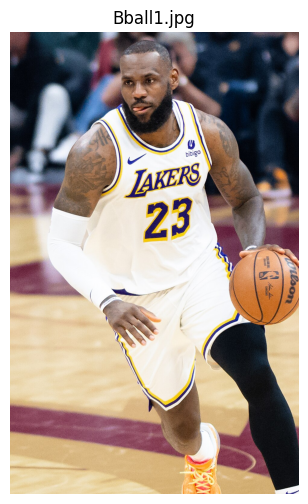


image 1/1 /content/test_images1/random2.jpg: 416x640 (no detections), 169.8ms
Speed: 11.9ms preprocess, 169.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
Number of hoops in image random2.jpg is 0


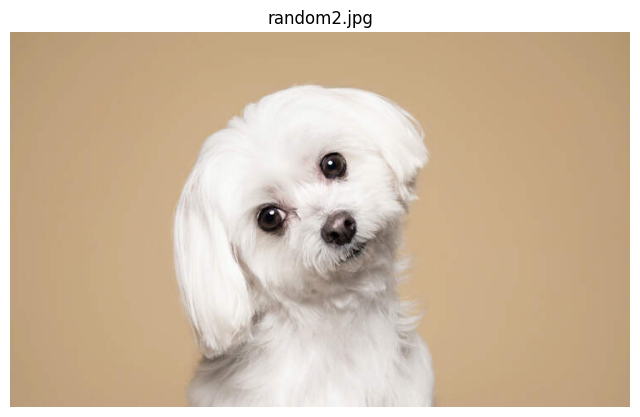

In [17]:
test_images = 'test_images1'
test_path = os.listdir(test_images)

test_files = [img for img in test_path if img.endswith((".jpg", ".jpeg", ".png", ".webp"))]

for img in test_files:
  test_img_path = os.path.join(test_images, img)
  res = model(test_img_path)[0]
  imgs_w_boxes = res.plot()
  plt.figure(figsize=(8,6))
  plt.imshow(cv2.cvtColor(imgs_w_boxes, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(img)

  hoop_count = sum(1 for c in res.boxes.cls if c == 0)
  print(f"Number of hoops in image {img} is {hoop_count}")
  plt.show()